In [1]:
import xarray as xr
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
lowess = sm.nonparametric.lowess

Matplotlib created a temporary cache directory at /jobfs/117725384.gadi-pbs/matplotlib-vhmyidps because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [9]:
data = np.random.normal(0, 0.2, 200)
data = data + np.linspace(0, 0.4, len(data))

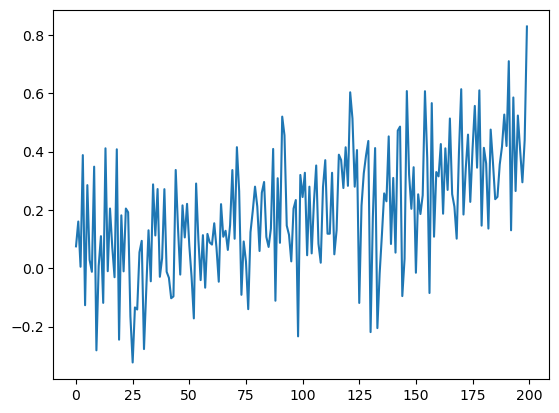

In [10]:
plt.plot(data)

In [12]:
lowess?

Signature:
lowess(
    endog,
    exog,
    frac=0.6666666666666666,
    it=3,
    delta=0.0,
    xvals=None,
    is_sorted=False,
    missing='drop',
    return_sorted=True,
)
Docstring:
LOWESS (Locally Weighted Scatterplot Smoothing)

A lowess function that outs smoothed estimates of endog
at the given exog values from points (exog, endog)

Parameters
----------
endog : 1-D numpy array
    The y-values of the observed points
exog : 1-D numpy array
    The x-values of the observed points
frac : float
    Between 0 and 1. The fraction of the data used
    when estimating each y-value.
it : int
    The number of residual-based reweightings
    to perform.
delta : float
    Distance within which to use linear-interpolation
    instead of weighted regression.
xvals: 1-D numpy array
    Values of the exogenous variable at which to evaluate the regression.
    If supplied, cannot use delta.
is_sorted : bool
    If False (default), then the data will be sorted by exog before
    calculating 

In [19]:
data_lowess = lowess(data, range(len(data)), frac=41/len(data), return_sorted=False)

In [22]:
data_detrned = data - data_lowess

In [24]:
noise = np.std(data_detrned)
noise

0.17265962873983096

In [25]:
data_sn = data_lowess/noise

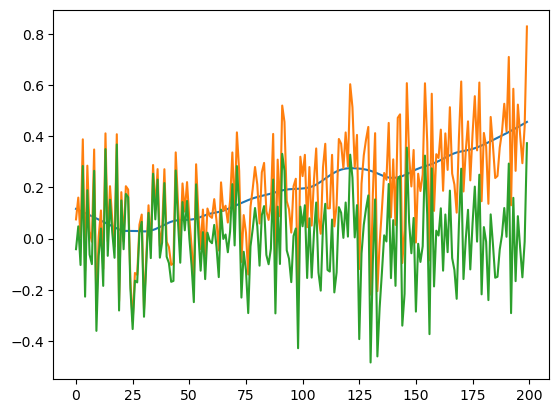

In [23]:
plt.plot(data_lowess)
plt.plot(data)
plt.plot(data_detrned)


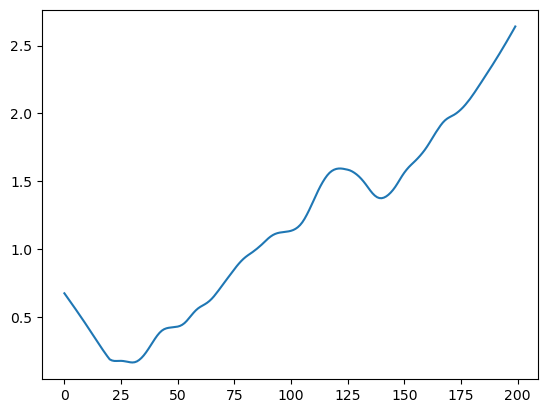

In [26]:
plt.plot(data_sn)